In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
mercdata = pd.read_csv("train.tsv", sep='\t')

In [3]:
mercdata.drop('train_id', axis = 1, inplace = True)

In [4]:
mercdata.dtypes

name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [5]:
mercdata.isna().sum()

name                      0
item_condition_id         0
category_name          4382
brand_name           442947
price                     0
shipping                  0
item_description          2
dtype: int64

We've a large number of nulls in brand_name and category_name

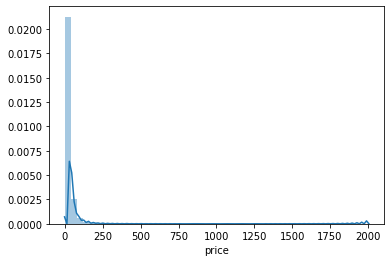

In [6]:
sns.distplot(mercdata.price)

Heavily Skewed distribution. When we apply the log transformation it gets closer to resembling a Gaussian distribution.

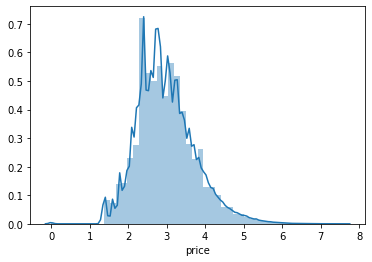

In [7]:
sns.distplot(np.log(1 + mercdata.price))

In [8]:
mercdata.groupby('shipping').price.describe()

,count,mean,std,min,25%,50%,75%,max
shipping,,,,,,,,
0,573836.0,30.119971,39.450359,0.0,13.0,20.0,33.0,2004.0
1,463938.0,22.548052,37.144438,0.0,8.0,14.0,25.0,2000.0


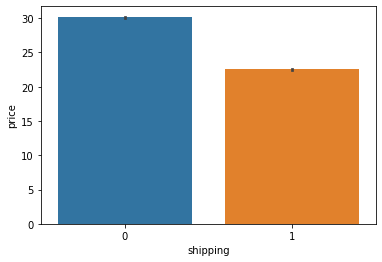

In [9]:
sns.barplot(x="shipping", y="price", data=mercdata)

We notice that when there is no additional shipping cost customers are willing to pay more for their products. 

In [10]:
mercdata.item_description = mercdata.item_description.fillna('')

In [11]:
mercdata['desc_len'] = mercdata.item_description.apply(lambda x: len(x))

In [12]:
desc_len_counts = mercdata.desc_len.value_counts()

In [13]:
desc_len_counts

18      62597
31       6688
37       6686
34       6673
36       6640
        ...  
1012        1
1046        1
1010        1
1018        1
1011        1
Name: desc_len, Length: 1015, dtype: int64

We remove the single outlier to make the plot more understandable.

In [14]:
desc_len_counts = desc_len_counts[desc_len_counts != 62597]


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Descprition Length')]

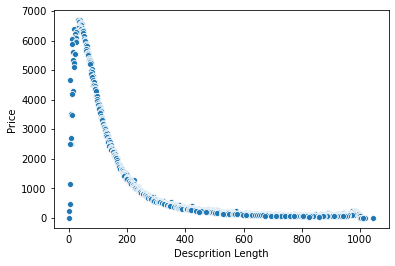

In [15]:
ax = sns.scatterplot(desc_len_counts.index, desc_len_counts.values)
ax.set(xlabel="Descprition Length", ylabel = "Price")

We noticed that most of the item_descriptions are short that is lesser than 200 words long.

In [16]:
df = mercdata.groupby('desc_len').price.describe()[:200]

In [17]:
df.reset_index(inplace=True)

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Descprition Length')]

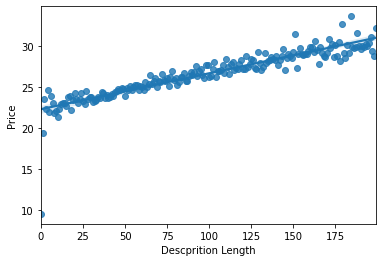

In [18]:
ax = sns.regplot('desc_len', 'mean', data = df)
ax.set(xlabel="Descprition Length", ylabel = "Price")

We notice that there is a linear trend with the price vs the item_description length and hence have created it as an additional feature.


In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Kalyan
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [21]:
mercdata.item_description = mercdata.item_description.fillna('')

In [22]:
mercdata.item_description = mercdata.item_description.apply(lambda x : x.replace('No description yet',''))

In [23]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

In [24]:
from wordcloud import WordCloud
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='black',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

In [25]:
def preprocess(sentence):
    sentence = sentence.lower()
    sentence = lemmatizer.lemmatize(sentence)
    tokens = tokenizer.tokenize(sentence)
    tokens = list(set(tokens))
    return tokens

In [26]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
mercdata['item_description'] = (mercdata['item_description'].apply(deEmojify)).apply(preprocess)

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(generate_wordcloud(mercdata['item_description']))
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
mercdata['name'] = (mercdata['name'].apply(deEmojify)).apply(preprocess)

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(generate_wordcloud(mercdata['brand_name'].dropna())) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(generate_wordcloud(mercdata['name'])) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
len(mercdata.category_name.value_counts())

We can see that there are 1258 unique categories.

In [ ]:
mercdata.category_name.fillna('Other//',inplace = True)

In [ ]:
t = mercdata.category_name.apply(lambda x : x.split("/", 2))
mercdata['Category1'] = t.apply(lambda x : x[0])
mercdata['Category2'] = t.apply(lambda x : x[1])
mercdata['Category3'] = t.apply(lambda x : x[2])

Now we split the category name into 1 main category and 2 sub categories.

In [ ]:
len(mercdata.Category1.value_counts())

There are 11 unique main categories.


In [ ]:
len(mercdata.Category2.value_counts())

There are 114 unique values for the first sub-category.

In [ ]:
len(mercdata.Category3.value_counts())

There are 858 unique values for the second sub-category.

In [ ]:
len(mercdata.brand_name.value_counts())

There are 4413 unique brand names in the given data set.

In [ ]:
df = mercdata.groupby('Category1').price.describe()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(20 ,10))
ax = sns.barplot('Category1', 'mean', data = df)
ax.set(xlabel="Category1", ylabel = "Price")